In [616]:
import pandas as pd
import numpy as np
import math
from pprint import pprint
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

df = pd.read_csv('glass.csv')
data = []
for i in df.values:
    data.append(i[0:-1])
data = np.array(data)

`Otsu Threshholding`

In [617]:
def otsu(bin_count,frequencies,edgebin):
    opt_threshold = 0
    min_intra_class_var = 619
    for cut in range(1, bin_count-1):
        w0 = sum(frequencies[:cut])/sum(frequencies)
        w1 = sum(frequencies[cut:])/sum(frequencies)
        m0 = sum([i*frequencies[i] for i in range(cut)])/sum(frequencies[:cut])
        m1 = sum([i*frequencies[i] for i in range(cut, bin_count)])/sum(frequencies[cut:])
        v0 = sum([((i-m0)**2)*frequencies[i] for i in range(cut)])/sum(frequencies[:cut])
        v1 = sum([((i-m1)**2)*frequencies[i] for i in range(cut, bin_count)])/sum(frequencies[cut:])
        v = w0*v0+w1*v1
        if v < min_intra_class_var:
            min_intra_class_var = v
            opt_threshold = cut
    edge_optimal = edgebin[opt_threshold]
    print("Optimal threshold =", edge_optimal)
    return opt_threshold,edge_optimal

`Implement Mahalanobis distances`

In [618]:
# call Mahalanobis.mahalanobis(data) -> float distances

class mahalanobis:
    def inv_covariance(X):
        covm =  np.cov(X.T)
        return np.linalg.inv(covm)
    def m_distance(p,X):
        m = np.mean(X.T,axis=1)
        xi = np.array(p-m).reshape(9,1)
        sigma = mahalanobis.inv_covariance(X)
        d = math.sqrt(np.dot(xi.T,np.dot(sigma,xi)))
        return d


Finding for Mahanolobis , otsu

Optimal threshold = 3.3614876441517527


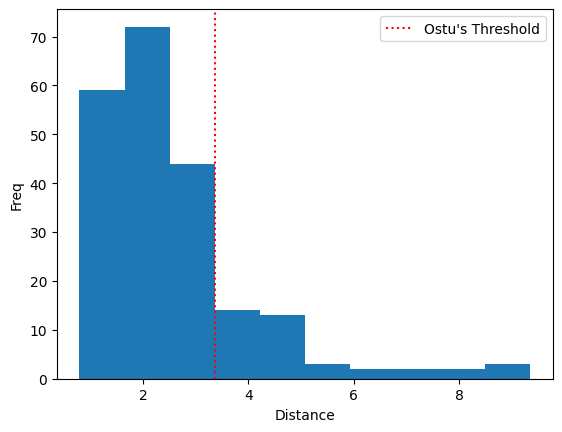

#Outliers = 39;
#Inliers = 175;


In [619]:
# distance_list = Mahalanobis.mahalanobis(data)   
distance_list = [mahalanobis.m_distance(i,data) for i in data]

bine =plt.hist(distance_list,bins = 10) 
freq = (bine[0])
edgebin = (bine[1])

bin_count = 10
inlyer = 0
outliyer = 0
threshold, edgethreshold = (otsu(bin_count,freq,edgebin))
for i in range(len(distance_list)): 
    if(distance_list[i]<=edgethreshold): inlyer+=1
    else : outliyer+=1

# print(threshold)
plt.axvline(x=edgethreshold,color = 'r', linestyle = ':', label = "Ostu's Threshold")
plt.xlabel('Distance')
plt.ylabel('Freq')
plt.legend()
plt.show()
print(f"""#Outliers = {outliyer};\n#Inliers = {inlyer};""")

## Implementing LOF

In [620]:
class LOF:                                               #implementing Local outlying factor LOF
    def local_outlier_factor(X, k : int): #X is np.array
        n_samples = X.shape[0]
        nbrs = NearestNeighbors(n_neighbors=k+1).fit(X) # add 1 to k to exclude the point itself
        distances, indices = nbrs.kneighbors(X)
        densities = 1. / (distances.sum(axis=1) / k) # compute the local density of each point
        lof_scores = np.zeros(n_samples)
        for i in range(n_samples):
            neighbors = indices[i][1:] # excluding itself
            neighbor_densities = densities[neighbors]
            lof_scores[i] = (neighbor_densities.mean() / densities[i]) # compute the LOF score of the point
        return lof_scores  #The LOF scores for each data point in X as a numpy array of shape (n_samples,)


Finding for LOF , otsu

Optimal threshold = 2.4083133777263424


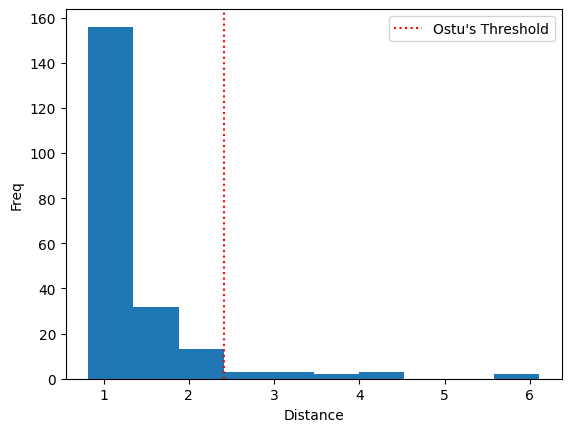

#Outliers = 13;
#Inliers = 201;


In [621]:
lofscores = LOF.local_outlier_factor(data,10)

bine =plt.hist(lofscores,bins = 10) 
freq = (bine[0])
edgebin = (bine[1])

bin_count = 10
inlyer = 0
outliyer = 0
threshold, edgethreshold = (otsu(bin_count,freq,edgebin))
for i in range(len(lofscores)): 
    if(lofscores[i]<=edgethreshold): inlyer+=1
    else : outliyer+=1
# print(threshold)
plt.axvline(x=edgethreshold,color = 'r', linestyle = ':', label = "Ostu's Threshold")
plt.xlabel('Distance')
plt.ylabel('Freq')
plt.legend()
plt.show()
print(f"""#Outliers = {outliyer};\n#Inliers = {inlyer};""")